# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from newsapi import NewsApiClient
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

C:\Users\mhasn\anaconda3\envs\mlenv\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mhasn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable

api_key = '888864d9b2c24994a1e438600dc05eaa'


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q="bitcoin", language="en", sort_by="relevancy")

In [5]:
print(f'totalResults for "bitcoin" articles: {bitcoin_articles["totalResults"]}')

totalResults for "bitcoin" articles: 9769


In [6]:
bitcoin_articles['articles'][0]

{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'https://www.engadget.com/about/editors/saqib-shah',
 'title': 'El Salvador becomes the first country to approve Bitcoin as legal currency',
 'description': 'El Salvador has voted to adopt Bitcoin as legal tender..',
 'url': 'https://www.engadget.com/el-salvador-bitcoin-legal-tender-120440725.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-06/84c12d30-c919-11eb-a6ff-cedcc0c31aae',
 'publishedAt': '2021-06-09T12:04:40Z',
 'content': "El Salvador's President Nayib Bukele has made good on his promise to adopt Bitcoin as legal tender. Officials in the Central American country's congress voted to accept the cryptocurrency by a majori… [+1414 chars]"}

In [7]:
# Fetch the Ethereum news articles
ether_articles = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy")

In [8]:

print(f'totalResults for "ethereum" articles: {ether_articles["totalResults"]}')

totalResults for "ethereum" articles: 2452


In [9]:
ether_articles['articles'][0]

{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Joseph Green',
 'title': 'This blockchain development course bundle is on sale for 97% off',
 'description': 'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\n\nIs everyone you know investing in cryptocurrency? The Cryptocurrency with Ethereum and Solidity Blockchain Dev…',
 'url': 'https://mashable.com/uk/shopping/june-17-cryptocurrency-ethereum-and-solidity-blockchain-developer-bundle/',
 'urlToImage': 'https://mondrian.mashable.com/2021%252F06%252F17%252Fa4%252Fd95c8d39ee014266beea8c6b9d053d19.1c765.jpg%252F1200x630.jpg?signature=13rMcdTv3FsupfDx5m8coAhsN-4=',
 'publishedAt': '2021-06-17T04:05:00Z',
 'content': 'TL;DR: The Cryptocurrency with Ethereum and Solidity Blockchain Developer Bundle is on sale for £21.25 as of June 17, saving you 97% on list price.\r\nIs everyone you know investing in cryptocurrency? … [+949 chars

In [10]:
# Create the Bitcoin sentiment scores DataFrame

BTC_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        BTC_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass


In [11]:
BTC_df = pd.DataFrame(BTC_sentiments)

In [12]:
BTC_df.head()

,text,date,compound,positive,negative,neutral
0,El Salvador's President Nayib Bukele has made ...,2021-06-09,0.8402,0.282,0.0,0.718
1,El Salvador has become the first country in th...,2021-06-09,0.1280,0.043,0.0,0.957
2,"It's all about clean energy, it seems. \r\nElo...",2021-06-14,0.6908,0.169,0.0,0.831
3,image captionThe move means bitcoin will be ac...,2021-06-09,0.2732,0.060,0.0,0.940
4,"Several crypto fans that descended on Miami, F...",2021-06-11,0.5574,0.107,0.0,0.893


In [13]:
BTC_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.211855,0.077350,0.020400,0.902200
std,0.329191,0.071029,0.032425,0.072576
min,-0.381800,0.000000,0.000000,0.718000
25%,0.000000,0.032250,0.000000,0.844750
50%,0.165150,0.065500,0.000000,0.922000
75%,0.369700,0.107250,0.057250,0.955500
max,0.840200,0.282000,0.083000,1.000000


In [14]:
# Create the Ethereum sentiment scores DataFrame
ether_sentiments = []

for article in ether_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ether_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass


In [15]:
Ether_df = pd.DataFrame(ether_sentiments)

In [16]:
Ether_df.head()

,text,date,compound,positive,negative,neutral
0,TL;DR: The Cryptocurrency with Ethereum and So...,2021-06-17,0.0000,0.000,0.000,1.000
1,It wasn't long ago that your average person ha...,2021-06-20,-0.2960,0.000,0.061,0.939
2,This article was translated from our Spanish e...,2021-06-10,-0.3400,0.000,0.066,0.934
3,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,2021-07-02,0.3612,0.110,0.041,0.849
4,CryptoPunks represent the only historically re...,2021-06-04,-0.4588,0.067,0.151,0.782


In [17]:
# Describe the Ethereum Sentiment
Ether_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.048385,0.026650,0.036700,0.936650
std,0.308969,0.038688,0.042793,0.052997
min,-0.458800,0.000000,0.000000,0.782000
25%,-0.307000,0.000000,0.000000,0.920000
50%,0.000000,0.000000,0.020500,0.936500
75%,0.207425,0.065500,0.063000,0.961000
max,0.493900,0.110000,0.151000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [18]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [19]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))
print(sw)



{"shouldn't", 'some', 'that', "you'd", 'them', 'don', 'between', 'be', 'on', 'm', "don't", 'y', 'her', 'haven', 'to', 'themselves', 've', 'with', 'same', 'because', 'most', 'i', 'our', 'can', 'into', 'during', 'yourself', 'against', 'in', 'aren', 'after', "should've", 'won', 'the', 'doesn', 't', 'only', 'ourselves', 'once', "she's", "wasn't", 'few', 'but', "you'll", 'all', 'she', 'doing', 'having', 'under', "mustn't", 'through', 'for', 's', 'which', 'weren', "haven't", 'too', 'ain', 'll', 'he', 'again', "it's", "hadn't", 'its', 're', 'couldn', 'as', 'out', 'where', "won't", 'both', "hasn't", 'nor', 'down', 'mustn', 'those', 'is', 'so', 'own', 'it', 'him', 'an', 'you', "aren't", 'are', 'a', 'about', 'other', 'was', 'no', 'while', 'from', 'do', "weren't", 'herself', 'they', 'had', 'and', 'did', 'here', 'wouldn', 'than', "wouldn't", 'until', 'ma', 'being', 'isn', 'very', 'what', 'their', 'am', 'this', 'just', 'mightn', 'his', "didn't", "you've", 'why', 'd', 'more', 'shouldn', 'further', '

In [20]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile('[^a-zA-Z ]')
    re_clean = regex.sub(' ', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove the stop words
    
    
    return tokens

In [21]:
# Create a new tokens column for Bitcoin
BTC_df['tokens'] = BTC_df['text'].apply(tokenizer)
BTC_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,El Salvador's President Nayib Bukele has made ...,2021-06-09,0.8402,0.282,0.0,0.718,"[el, salvador, president, nayib, bukele, ha, m..."
1,El Salvador has become the first country in th...,2021-06-09,0.1280,0.043,0.0,0.957,"[el, salvador, ha, become, first, country, wor..."
2,"It's all about clean energy, it seems. \r\nElo...",2021-06-14,0.6908,0.169,0.0,0.831,"[clean, energy, seems, elon, musk, tesla, caus..."
3,image captionThe move means bitcoin will be ac...,2021-06-09,0.2732,0.060,0.0,0.940,"[image, captionthe, move, mean, bitcoin, accep..."
4,"Several crypto fans that descended on Miami, F...",2021-06-11,0.5574,0.107,0.0,0.893,"[several, crypto, fan, descended, miami, flori..."


In [22]:
# Create a new tokens column for Ethereum
Ether_df['tokens'] = Ether_df['text'].apply(tokenizer)
Ether_df.head()

,text,date,compound,positive,negative,neutral,tokens
0,TL;DR: The Cryptocurrency with Ethereum and So...,2021-06-17,0.0000,0.000,0.000,1.000,"[tl, dr, cryptocurrency, ethereum, solidity, b..."
1,It wasn't long ago that your average person ha...,2021-06-20,-0.2960,0.000,0.061,0.939,"[long, ago, average, person, clue, nft, wa, no..."
2,This article was translated from our Spanish e...,2021-06-10,-0.3400,0.000,0.066,0.934,"[article, wa, translated, spanish, edition, us..."
3,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,2021-07-02,0.3612,0.110,0.041,0.849,"[bitcoin, ethereum, yuriko, nakao, ether, over..."
4,CryptoPunks represent the only historically re...,2021-06-04,-0.4588,0.067,0.151,0.782,"[cryptopunks, represent, historically, relevan..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [23]:
from collections import Counter
from nltk import ngrams

In [24]:
# Generate the Bitcoin N-grams where N=2
BTC_tokens = tokenizer(BTC_df['text'].str.cat())

In [25]:
BTC_ngram = Counter(ngrams(BTC_tokens, n=2))

In [26]:
Counter(list(BTC_ngram)).most_common(10)

[(('el', 'salvador'), 1),
 (('salvador', 'president'), 1),
 (('president', 'nayib'), 1),
 (('nayib', 'bukele'), 1),
 (('bukele', 'ha'), 1),
 (('ha', 'made'), 1),
 (('made', 'good'), 1),
 (('good', 'promise'), 1),
 (('promise', 'adopt'), 1),
 (('adopt', 'bitcoin'), 1)]

In [27]:
# Generate the Ethereum N-grams where N=2
ETH_tokens = tokenizer(Ether_df['text'].str.cat())

In [28]:
ETH_ngram = Counter(ngrams(ETH_tokens, n=2))

In [29]:
Counter(list(ETH_ngram)).most_common(10)

[(('tl', 'dr'), 1),
 (('dr', 'cryptocurrency'), 1),
 (('cryptocurrency', 'ethereum'), 1),
 (('ethereum', 'solidity'), 1),
 (('solidity', 'blockchain'), 1),
 (('blockchain', 'developer'), 1),
 (('developer', 'bundle'), 1),
 (('bundle', 'sale'), 1),
 (('sale', 'june'), 1),
 (('june', 'saving'), 1)]

In [30]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [31]:
# Use token_count to get the top 10 words for Bitcoin
token_count(BTC_tokens, N=10)

[('bitcoin', 20),
 ('char', 19),
 ('reuters', 11),
 ('salvador', 9),
 ('cryptocurrency', 8),
 ('el', 7),
 ('legal', 6),
 ('tender', 5),
 ('country', 5),
 ('june', 5)]

In [32]:
# Use token_count to get the top 10 words for Ethereum
token_count(ETH_tokens, N=10)

[('char', 19),
 ('bitcoin', 18),
 ('cryptocurrency', 14),
 ('world', 12),
 ('biggest', 9),
 ('previous', 8),
 ('close', 8),
 ('best', 8),
 ('known', 8),
 ('reuters', 8)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [34]:
BTC_text = BTC_df['text']

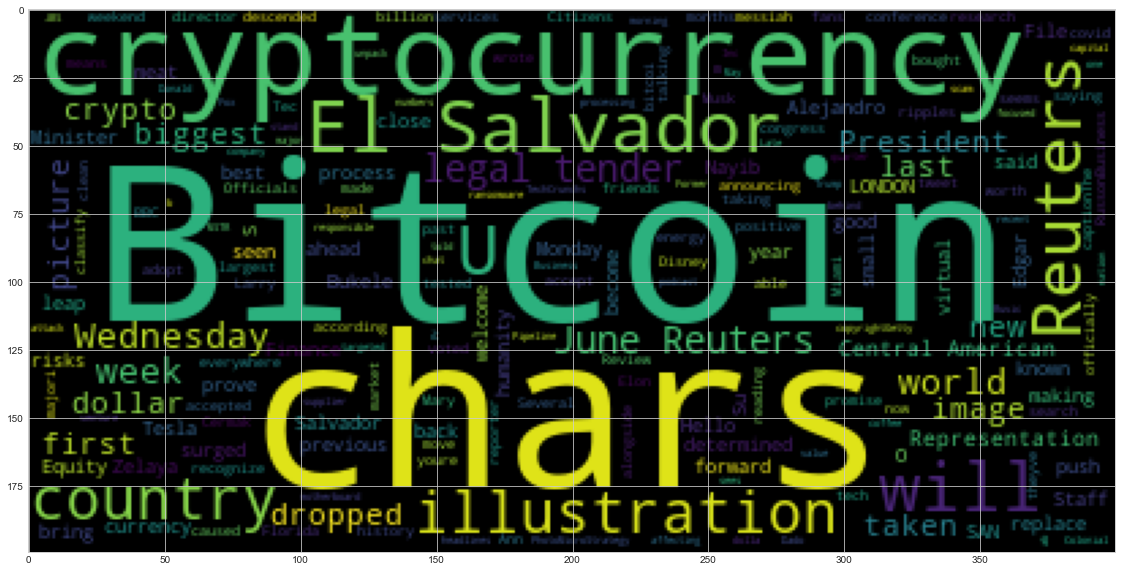

In [35]:
# Generate the Bitcoin word cloud

wc = WordCloud().generate(' '.join(BTC_text))
plt.imshow(wc)


In [36]:
ETH_text = Ether_df['text']

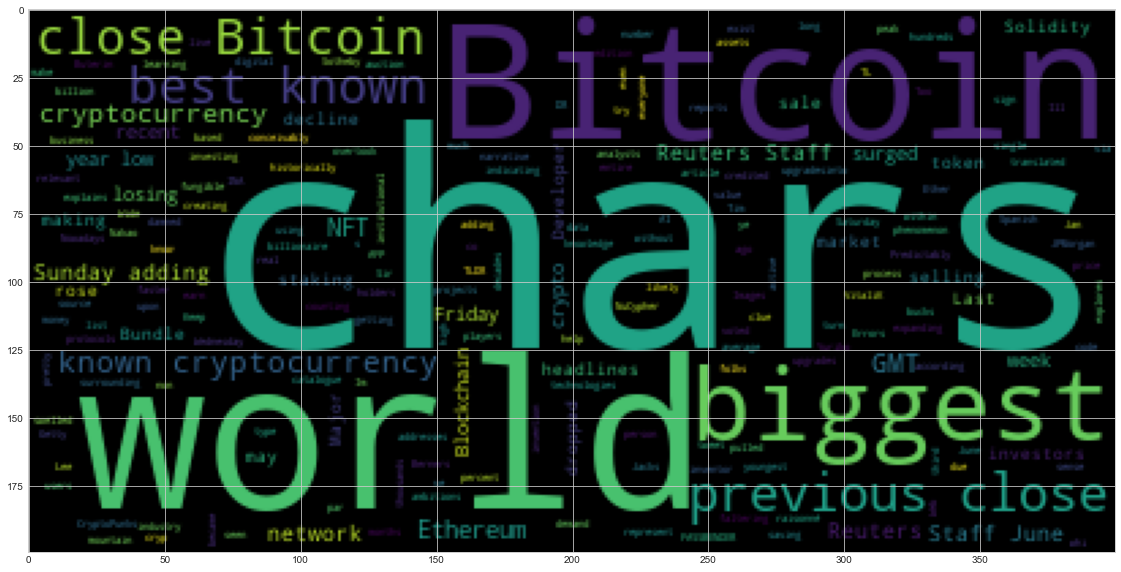

In [37]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(ETH_text))
plt.imshow(wc)


---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [38]:
import spacy
from spacy import displacy

In [39]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [40]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [41]:
# Concatenate all of the Bitcoin text together
BTC_text = BTC_df['text'].str.cat()

In [42]:
# Run the NER processor on all of the text
btc_ner = nlp(BTC_text)

# Add a title to the document
btc_ner.user_data['title'] = 'Bitcoin NER'

In [43]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [44]:
# List all Entities
print([ent.text for ent in btc_ner.ents if ent.label_ =='ORG'])

['Salvador', 'Citizens', 'Tesla', 'Disney', 'BBC News', 'Fox Business', 'SALVADOR', 'Reuters', 'Finance', 'Reuters', 'Reuters', 'Reuters', 'Reuters', 'Finance', 'Colonial Pipeline', 'JBS', 'Reuters', 'Bitcoin', 'Reuters', 'GMT', 'Reuters']


---

### Ethereum NER

In [45]:
# Concatenate all of the Ethereum text together
ETH_text = Ether_df['text'].str.cat()

In [46]:
# Run the NER processor on all of the text
ETH_ner = nlp(ETH_text)

# Add a title to the document
ETH_ner.user_data['title'] = 'Ether NER'

In [47]:
# Render the visualization
displacy.render(ETH_ner, style='ent')

In [48]:
# List all Entities
print([ent.text for ent in btc_ner.ents if ent.label_ =='ORG'])

['Salvador', 'Citizens', 'Tesla', 'Disney', 'BBC News', 'Fox Business', 'SALVADOR', 'Reuters', 'Finance', 'Reuters', 'Reuters', 'Reuters', 'Reuters', 'Finance', 'Colonial Pipeline', 'JBS', 'Reuters', 'Bitcoin', 'Reuters', 'GMT', 'Reuters']


---